# **Ecommerce Platform Focus Analysis**
You just got some contract work with an Ecommerce company based in New York City that sells clothing online but also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# **Exploratory Data Analysis**


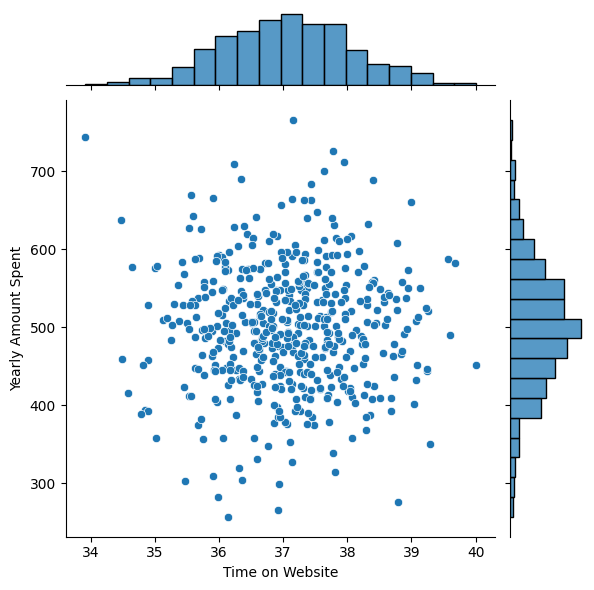

In [6]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

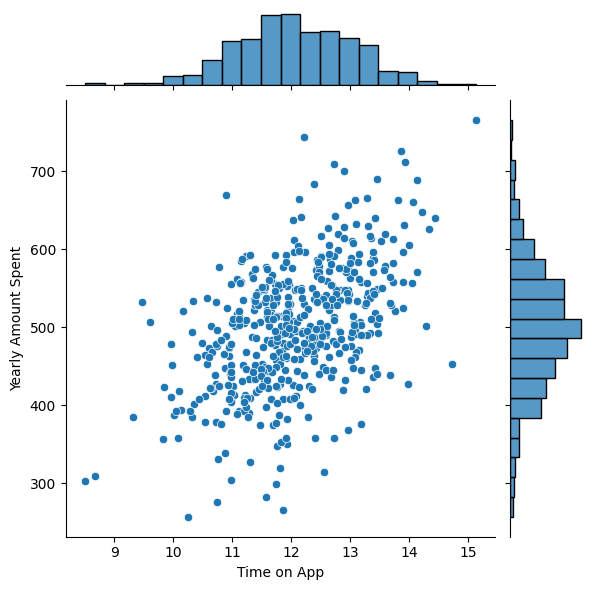

In [7]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

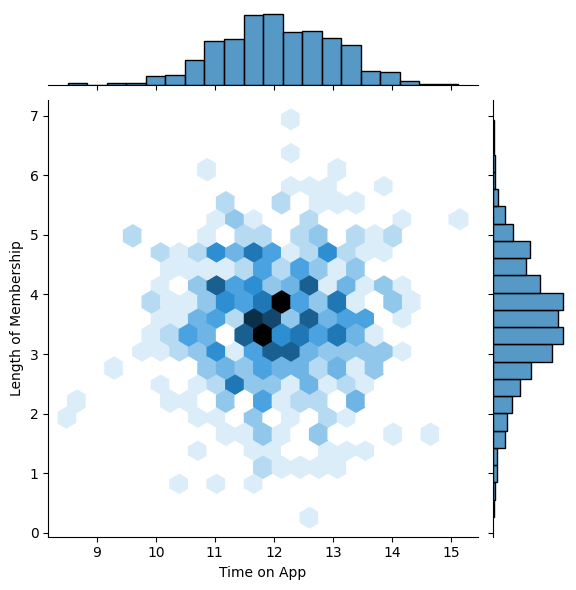

In [8]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=df)

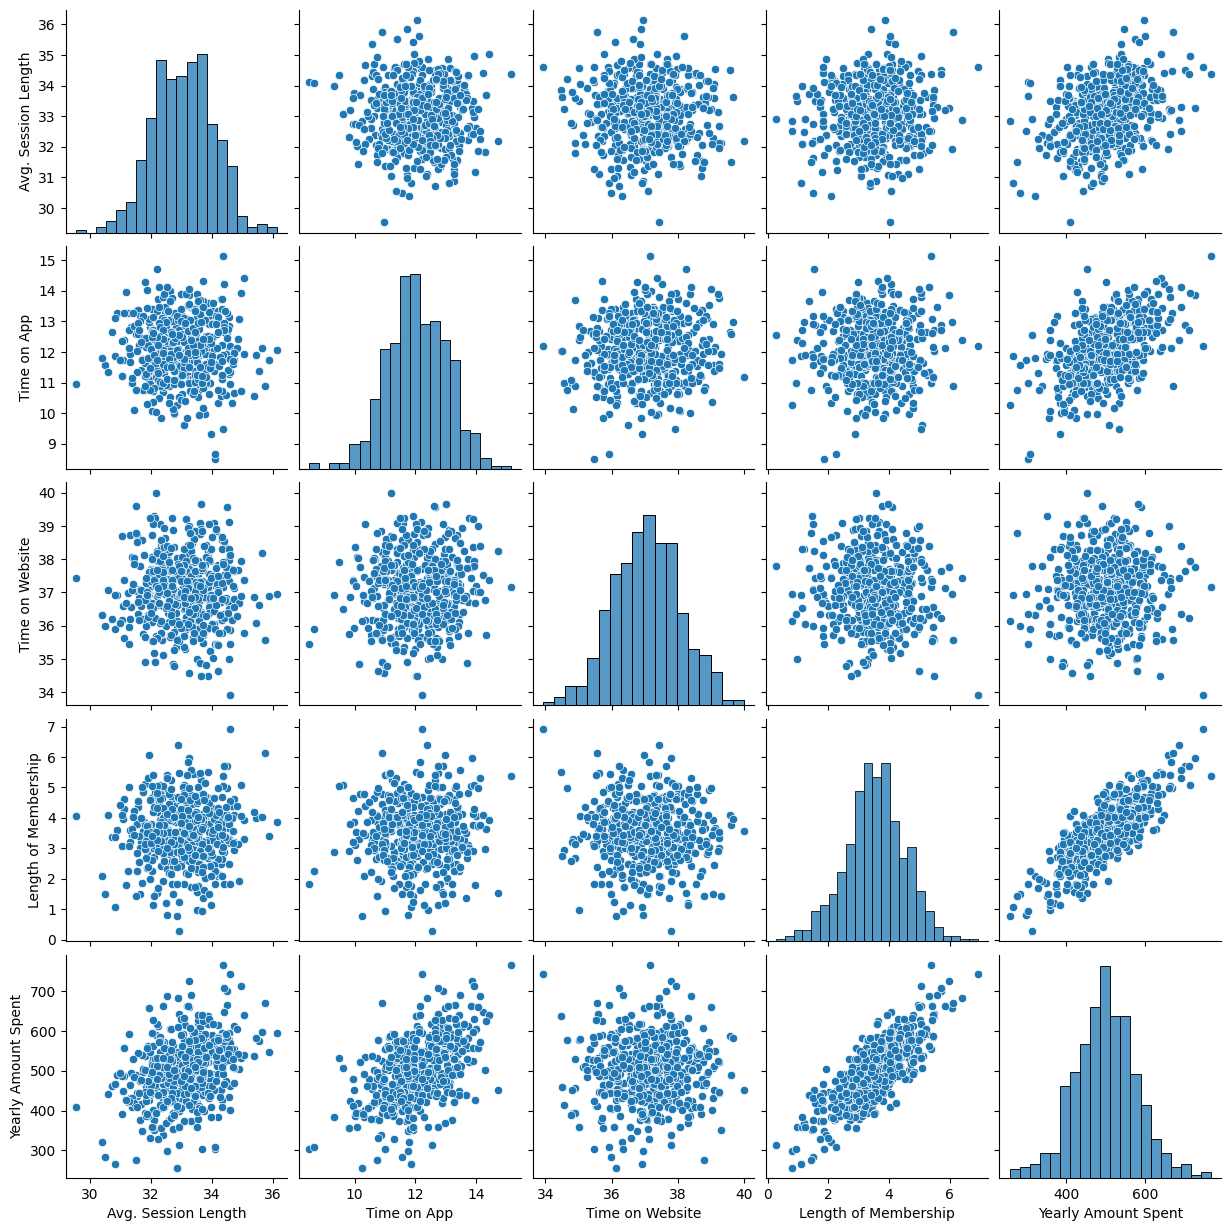

In [9]:
sns.pairplot(df)

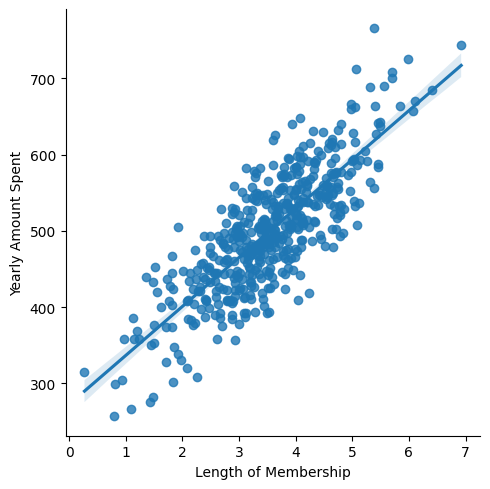

In [10]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

# **Training and Testing Data**
Now that we have explored the data, we will split the data into training and testing sets.

In [11]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
y = df['Yearly Amount Spent']

In [14]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# **Training the Model**


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [28]:
model.fit(X_train,y_train)

LinearRegression()

In [29]:
model.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

# **Predicting Test Data**
Now that we have fit our model, let's evaluate it's performance by predicting off the test values.

In [30]:
predictions = model.predict(X_test)

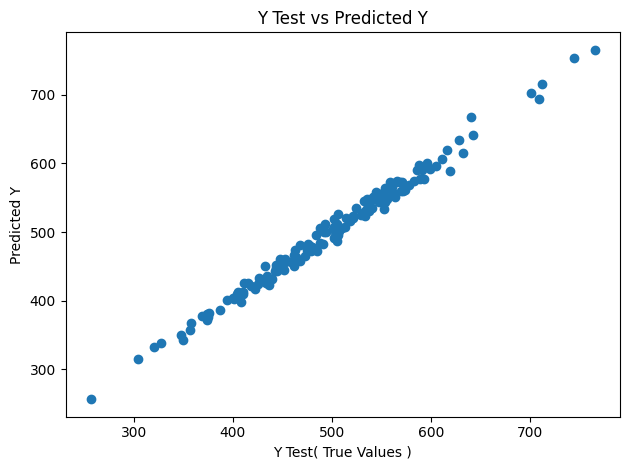

In [38]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test( True Values )')
plt.ylabel('Predicted Y')
plt.title('Y Test vs Predicted Y')
plt.tight_layout()

# **Evaluating the Model**
Let's now evaluate the model performance by calculating the residual sum of squares and the variance score(R^2).

In [40]:
from sklearn import metrics

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


In [42]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

# **Residuals**
As we got a very good model with a good fit, we will quickly explore the residuals to make sure everything was okay with our data.

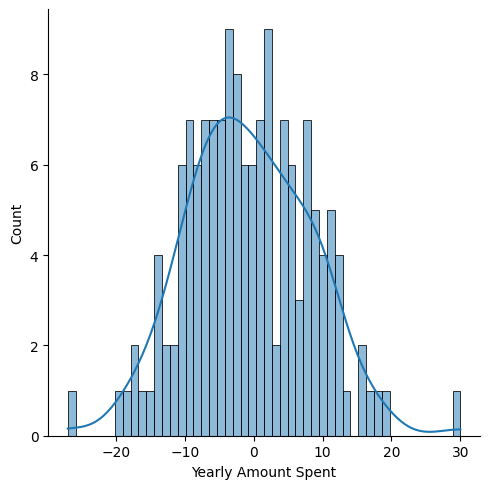

In [46]:
sns.displot(y_test-predictions,kde=True,bins=50)

# **Conclusion**
Let's see if we can interpret the coefficients at all to get the answer to the business question.

In [48]:
cdf = pd.DataFrame(model.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


# *Approaches that can be used:*
*Approach 1:*
As the Time on App has better relavance with Yearly amount spent, the company may focus on it only.

*Approach 2:*
As the Time on Website is too much less, the company can focus on website development more to make both platforms balanced for better sales.
